<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit01-pytorch-tensors/01_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Code Efficiency with Linear Algebra

**Reference**

[Code Efficiency with Linear Algebra](https://lightning.ai/pages/courses/deep-learning-fundamentals/2-0-unit-2-overview/2-4-improving-code-efficiency-with-linear-algebra-parts-1-4/)

[Deep Learning Fundamentals: Code Materials and Exercises](https://github.com/Lightning-AI/dl-fundamentals)

##Setup

In [2]:
import random
import pandas as pd
import numpy as np
import torch

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/rahiakela/deep-learning-research-and-practice/raw/main/deep-learning-fundamentals/unit01-ml-intro/perceptron_toydata-truncated.txt

##Dataset

In [ ]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [ ]:
x_train = df[["x1", "x2"]].values
y_train = df["label"].values

print(x_train.shape, y_train.shape)
x_train[:5]

(20, 2) (20,)


array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53]])

In [ ]:
np.bincount(y_train)

array([10, 10])

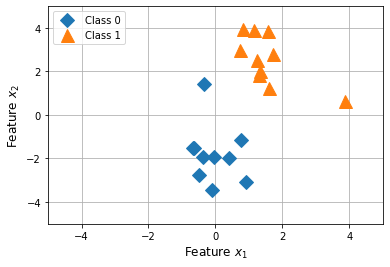

In [ ]:
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], marker="D", markersize=10, linestyle="", label="Class 0")
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], marker="^", markersize=13, linestyle="", label="Class 1")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

##Part 1: From Loops to Dot Products

In [2]:
b = 0.0
x = [1.2, 2.2]
w = [3.3, 4.3]

output = b
for x_i, w_i in zip(x, w):
  output += x_i * w_i
print(output)

13.42


In [3]:
b = torch.tensor([0.0])
x = torch.tensor([1.2, 2.2])
w = torch.tensor([3.3, 4.3])

output = x.dot(w) + b
print(output)

tensor([13.4200])


###Benchmark

In [4]:
def plain_python(x, w, b):
  output = b
  for x_i, w_i in zip(x, w):
    output += x_i * w_i
  return output

In [5]:
random.seed(123)

b = 0.0
x = [random.random() for _ in range(1000)]
w = [random.random() for _ in range(1000)]

In [6]:
%%timeit

plain_python(x, w, b)

120 µs ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
def pytorch_dot(x, w, b):
  return x.dot(w) + b

In [8]:
t_b = torch.tensor(b)
t_x = torch.tensor(x)
t_w = torch.tensor(w)

In [9]:
%%timeit

pytorch_dot(t_x, t_w, t_b)

6.82 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


##Part 2:Matrix-Vector Multiplication

In [3]:
b = 0.0
X = [
  [1.2, 2.2],
  [4.4, 5.5]
]
w = [3.3, 4.3]

outputs = []
for x in X:
  output = b
  for x_j, w_j in zip(x, w):
    output += x_j * w_j
  outputs.append(output)
outputs 

[13.42, 38.17]

In [4]:
b = torch.tensor([0.0])
X = torch.tensor([
  [1.2, 2.2],
  [4.4, 5.5]
])
w = torch.tensor([3.3, 4.3])

X.matmul(w) + b

tensor([13.4200, 38.1700])

###Benchmark

In [5]:
random.seed(123)

b = 0.0
# 1000 coloumns and  500 rows
X = [[random.random() for _ in range(1000)] for i in range(500)]
w = [random.random() for _ in range(1000)]

def plain_python(X, w, b):
  outputs = []
  for x in X:
    output = b
    for x_j, w_j in zip(x, w):
      output += x_j * w_j
    outputs.append(output)
  return outputs 

In [6]:
%timeit plain_python(X, w, b)

33 ms ± 584 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
t_b = torch.tensor(b)
t_x = torch.tensor(X)
t_w = torch.tensor(w)

def pytorch_implementation(X, w, b):
  return X.matmul(w) + b

In [9]:
%timeit pytorch_implementation(t_x, t_w, t_b)

50.1 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


##Part 3:Matrix-Matrix Multiplication

In [10]:
a = torch.tensor([1.2, 5.1, -4.6])
b = torch.tensor([-2.1, 3.1, 5.5])

a.dot(b)

tensor(-12.0100)